# D7062E Project
## Project Group 10

Contributors:
- Theo HEMBÄCK
- PARIPÁS Viktor
- Jerker ÅBERG
- Kristofer ÅGREN

# Task 1

## Importing dependencies
We used the following libraries in the first task:
- `pandas` to manipulate the data
- `scikit-learn` for imputing and scaling the data
- `seaborn` and `matplotlib` for visualization.

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Data exploration
Let's load the training dataset from the corresponding `.csv` file.
Since we know that the columns represent the mean/standard deviation of the positions and angles of the 60 points, respectively, followed by the label name and code, let us rename the columns accordingly to allow for easier reading.

In [2]:
def load_data():
    training_data = pd.read_csv("train-final.csv", header=None)
    test_data = pd.read_csv("test-final.csv", header=None)

    name_mappings = {
        # Feature columns
        **{i: f"positions_mean_{i}" for i in range(60)},
        **{i: f"positions_std_{i}" for i in range(60, 120)},
        **{i: f"angles_mean_{i}" for i in range(120, 180)},
        **{i: f"angles_std_{i}" for i in range(180, 240)},
        # Label columns
        **{240: "label_name", 241: "label_code"},
    }

    training_data.rename(name_mappings, axis=1, inplace=True)
    training_feature_columns = training_data.columns[:-2]

    training_features = training_data[training_feature_columns]
    training_labels = training_data.label_name
    training_codes = training_data.label_code

    test_data.rename(name_mappings, axis=1, inplace=True)
    test_feature_columns = test_data.columns[:-2]

    test_features = test_data[test_feature_columns]
    test_labels = test_data.label_name

    return (
        training_features,
        training_labels,
        training_codes,
        test_features,
        test_labels,
    )


(
    training_features,
    training_labels,
    training_codes,
    test_features,
    test_labels,
) = load_data()

Let's show some of the data

In [3]:
training_features.head()

,positions_mean_0,positions_mean_1,positions_mean_2,positions_mean_3,positions_mean_4,positions_mean_5,positions_mean_6,positions_mean_7,positions_mean_8,positions_mean_9,...,angles_std_230,angles_std_231,angles_std_232,angles_std_233,angles_std_234,angles_std_235,angles_std_236,angles_std_237,angles_std_238,angles_std_239
0,-0.479730,0.726079,2.403713,-0.481913,0.540689,2.455865,-0.646274,0.406351,2.428461,-0.312905,...,0.403147,0.422235,0.730551,0.367526,0.520040,0.493564,0.485049,0.477886,0.607874,0.441320
1,0.051888,0.646871,2.409750,0.060117,0.451912,2.449198,-0.106647,0.344324,2.461468,0.183852,...,0.458585,0.365385,0.428723,0.571661,0.431776,0.279627,0.595978,0.389501,0.241849,0.617291
2,-0.002692,0.624926,2.240212,0.018586,0.435987,2.269613,-0.152985,0.336314,2.305371,0.164105,...,0.556154,0.449078,0.537268,0.488480,0.540547,0.542650,0.430114,0.542999,0.454954,0.479623
3,-0.029336,0.664426,2.443440,-0.023426,0.480809,2.451577,-0.203417,0.353489,2.506273,0.119183,...,0.458485,0.420331,0.713397,0.387092,0.439498,0.417769,0.554555,0.498407,0.565789,0.455313
4,0.065604,0.639172,2.377587,0.069247,0.447377,2.405972,-0.092707,0.339007,2.368022,0.231172,...,0.498700,0.280299,0.671461,0.475014,0.401192,0.372539,0.578720,0.446630,0.580236,0.460550


In [4]:
test_features.head()

,positions_mean_0,positions_mean_1,positions_mean_2,positions_mean_3,positions_mean_4,positions_mean_5,positions_mean_6,positions_mean_7,positions_mean_8,positions_mean_9,...,angles_std_230,angles_std_231,angles_std_232,angles_std_233,angles_std_234,angles_std_235,angles_std_236,angles_std_237,angles_std_238,angles_std_239
0,-0.332255,0.672471,2.450465,-0.323645,0.486062,2.526748,-0.483695,0.370296,2.534973,-0.172186,...,0.348333,0.426959,0.604953,0.464157,0.751404,0.467516,0.306133,0.521694,0.546094,0.439480
1,-0.089784,0.656778,2.431880,-0.079363,0.467939,2.429239,-0.193909,0.349866,2.329680,0.081013,...,0.482754,0.456633,0.596048,0.461552,0.557319,0.373754,0.515013,0.413323,0.491261,0.530069
2,-0.427810,0.699557,2.347763,-0.444873,0.530140,2.433568,-0.610365,0.402565,2.398841,-0.264254,...,0.582908,0.412314,0.777705,0.318174,0.532617,0.476989,0.487606,0.604556,0.489667,0.433812
3,-0.089790,0.694279,2.428455,-0.072881,0.520537,2.496676,-0.255747,0.404209,2.520148,0.115363,...,0.409941,0.328799,0.551472,0.498960,0.313094,0.450005,0.581886,0.409794,0.377352,0.578679
4,-0.387741,0.540410,2.399926,-0.406310,0.361768,2.459448,-0.576004,0.262814,2.457772,-0.256852,...,0.348730,0.311284,0.684091,0.457543,0.446787,0.499285,0.512345,0.366741,0.468337,0.526775


How many different labels do we have in the training dataset?

In [5]:
number_of_classes = training_labels.nunique()
number_of_classes

30

Now let's take a look at how many occurrences we have of each label.

<AxesSubplot: >

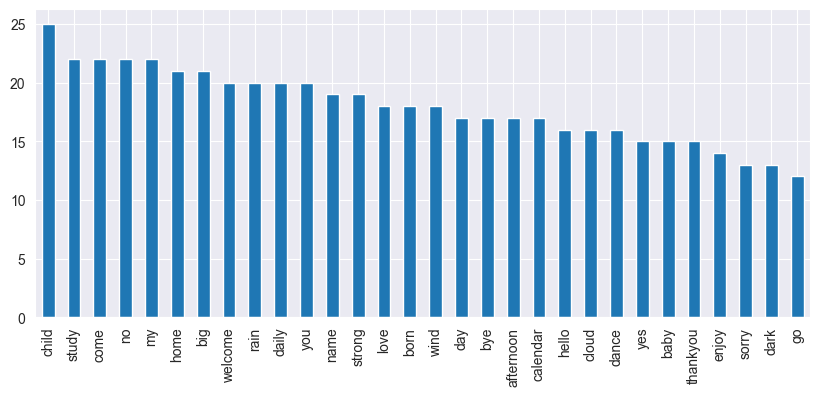

In [6]:
training_labels.value_counts().plot(kind="bar", figsize=(10, 4))

We can see that `child` is the most common label in the training dataset and that `go` is the least common label.

## Preprocessing

Some classifiers are more sensitive to the range, mean & outliers of the features, such as linear regression models, for example.
In order to be able to train a wide range of classifiers and compare them, we will need to preprocess the data for scaling and outlier treatment.

### Handling outliers

Let's see if the dataset also contains outliers. There are quite a few way to detect outliers (Source:
[Outlier detection methods in Scikit-Learn](https://scikit-learn.org/stable/modules/outlier_detection.html)):
- Isolation forest
- Local outlier factor
- One-class support vector machine (SVM)
- Elliptic envelope

We start by doing a **boxplot** for all features to get a visual indication of the outlier situation. The boxplot (or box-and-whisker plot) shows the
- inter-quartile range as a box
- with the median marked in the middle,
- as well as whiskers of given length extending from the quartiles,
- with outliers (points outside the whiskers) plotted as individual points
for a given column.
Because of the last bullet point, it is a good choice to assess the extent of the outlier problem.

([<matplotlib.axis.XTick at 0x17ad71040>], [Text(1, 0, '')])

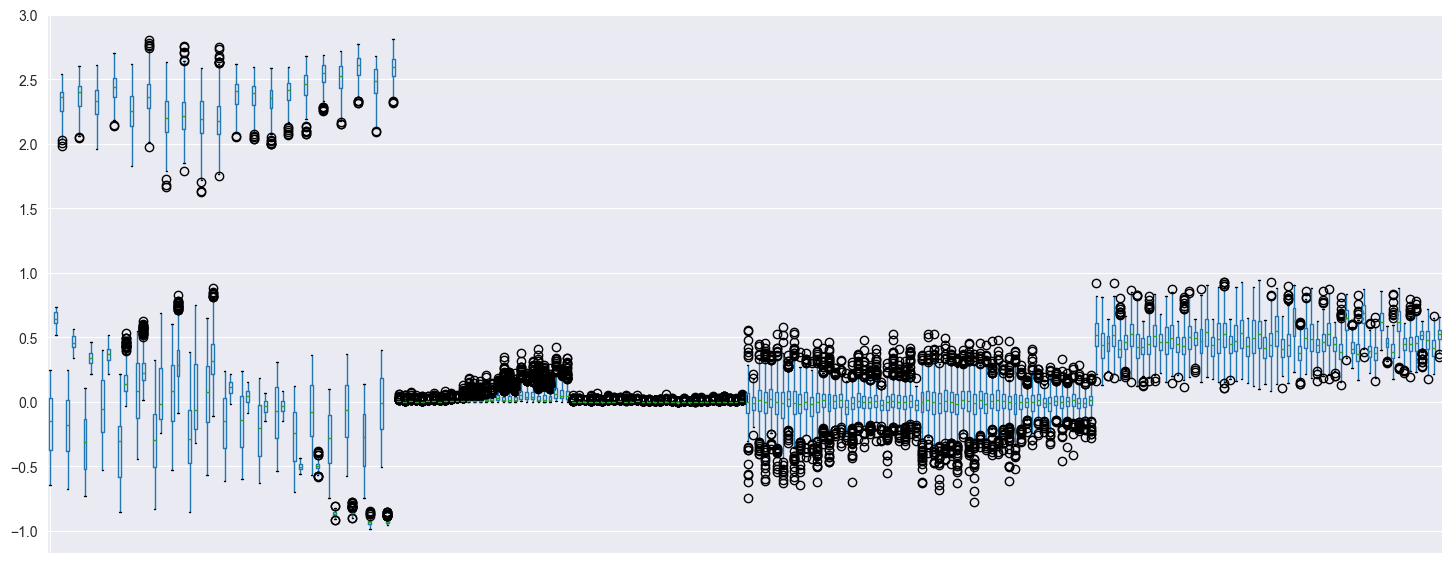

In [7]:
training_features.boxplot(figsize=(18, 7))
plt.xticks([1], [""])

Based on the boxplot, there appears to be many columns with outliers. Many classifiers, e.g. linear classifiers like Logistic Regression will not handle outliers well, so we need to find a way to handle outliers.

As we saw in the boxplot above, there are many columns with outliers. And while there are many methods to detect outliers,let's begin with just identifying the **values** that are farthest from the mean.

A simple approach is to identify the values that lie outside of 3$\sigma$ (that is, three times the standard deviation) as outliers, and drop the rows that have at least one outlier. Let's give it a try.

In [8]:
from scipy import stats

training_features_outliers_marked = training_features[
    np.abs(stats.zscore(training_features.fillna(training_features.mean()))) < 3
]

In [9]:
training_features_outliers_marked.head()

,positions_mean_0,positions_mean_1,positions_mean_2,positions_mean_3,positions_mean_4,positions_mean_5,positions_mean_6,positions_mean_7,positions_mean_8,positions_mean_9,...,angles_std_230,angles_std_231,angles_std_232,angles_std_233,angles_std_234,angles_std_235,angles_std_236,angles_std_237,angles_std_238,angles_std_239
0,-0.479730,0.726079,2.403713,-0.481913,0.540689,2.455865,-0.646274,0.406351,2.428461,-0.312905,...,0.403147,0.422235,0.730551,0.367526,0.520040,0.493564,0.485049,0.477886,0.607874,0.441320
1,0.051888,0.646871,2.409750,0.060117,0.451912,2.449198,-0.106647,0.344324,2.461468,0.183852,...,0.458585,0.365385,0.428723,0.571661,0.431776,0.279627,0.595978,0.389501,0.241849,0.617291
2,-0.002692,0.624926,2.240212,0.018586,0.435987,2.269613,-0.152985,0.336314,2.305371,0.164105,...,0.556154,0.449078,0.537268,0.488480,0.540547,0.542650,0.430114,0.542999,0.454954,0.479623
3,-0.029336,0.664426,2.443440,-0.023426,0.480809,2.451577,-0.203417,0.353489,2.506273,0.119183,...,0.458485,0.420331,0.713397,0.387092,0.439498,0.417769,0.554555,0.498407,0.565789,0.455313
4,0.065604,0.639172,2.377587,0.069247,0.447377,2.405972,-0.092707,0.339007,2.368022,0.231172,...,0.498700,0.280299,0.671461,0.475014,0.401192,0.372539,0.578720,0.446630,0.580236,0.460550


Number of rows left: 250


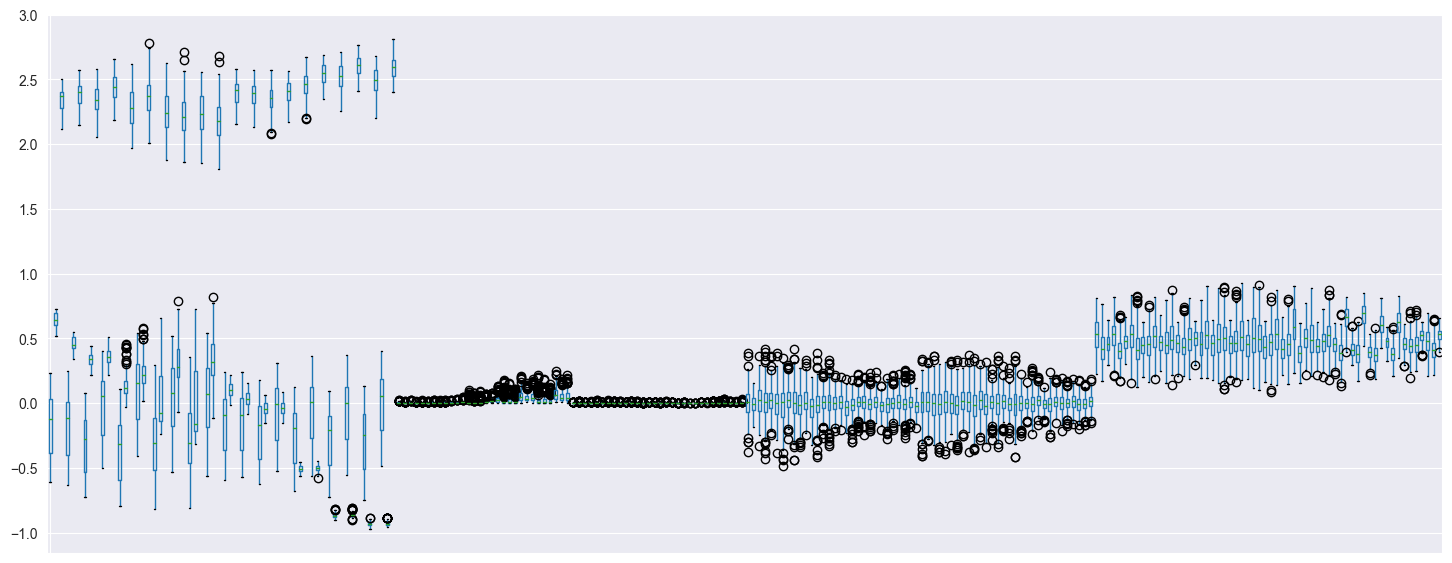

In [10]:
training_features_outliers_removed = training_features_outliers_marked.dropna()
training_features_outliers_removed.boxplot(figsize=(18, 7))
plt.xticks([1], [""])
print(f"Number of rows left: {training_features_outliers_removed.shape[0]}")

The boxplot now looks better, except for the second part (columns 60 to 120), which is `positions_std_i`.
We can also see that if we remove all the rows with at least one detected outlier, we are left with less than half of the original data! This is due to the large number of features.

We need another method for this dataset, let's instead cap the outliers to 3 $\sigma$.

In [11]:
def run_outlier_handling_pipeline(dataframe, std_cap=3):
    dataframe = dataframe.copy()
    for column in dataframe.columns:
        mean = dataframe[column].mean(skipna=True)
        std = dataframe[column].std(skipna=True)

        dataframe[column] = np.clip(
            dataframe[column],
            -(mean + std_cap * std),
            mean + std_cap * std,
        )

    return dataframe

([<matplotlib.axis.XTick at 0x17eb274f0>], [Text(1, 0, '')])

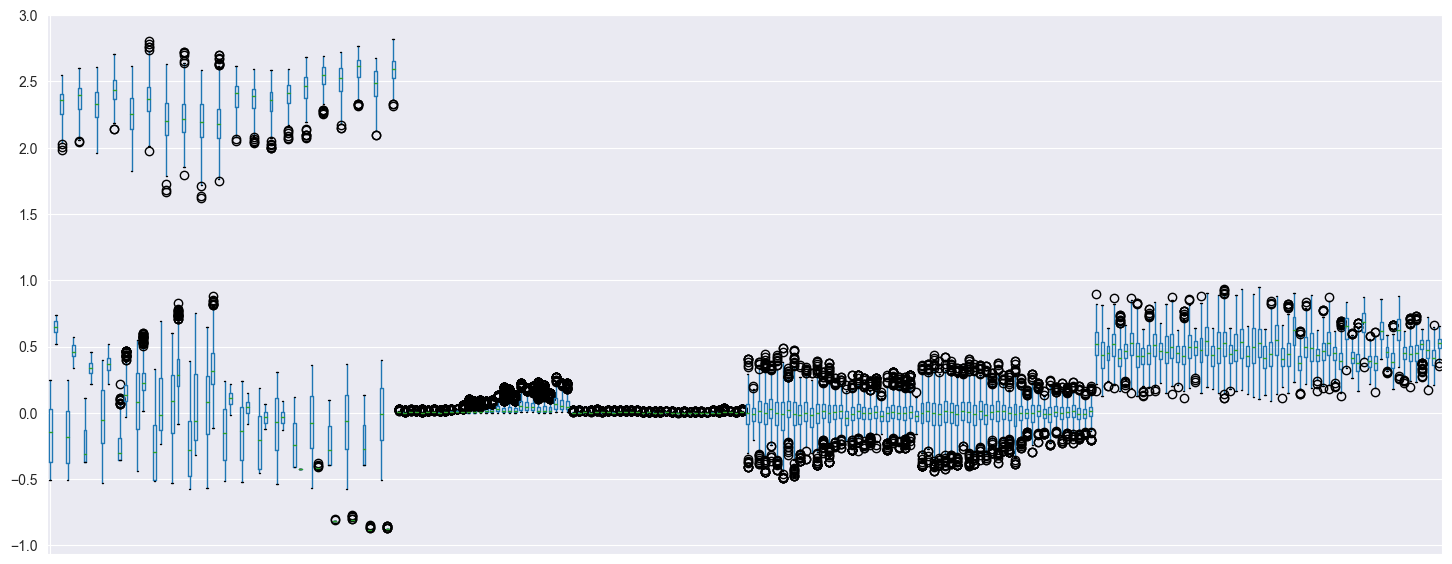

In [12]:
outlier_handled_data = run_outlier_handling_pipeline(training_features)
outlier_handled_data.boxplot(figsize=(18, 7))
plt.xticks([1], [""])

The boxplot still looks more promising than the original, and we managed to maintain all of our features. Now let's move on to handling the missing data.

### Missing data

Now let's look for columns that have missing values. The missing values are in the following columns (along with the missing value count):

In [13]:
columns_null_sum = training_features.isnull().sum()
columns_with_nulls = columns_null_sum[columns_null_sum > 0]

print(
    "Total amount of missing values in the dataframe:",
    training_features.isnull().sum().sum(),
)
print("Missing values in the following column indexes (and missing value count):")
print(columns_with_nulls)

Total amount of missing values in the dataframe: 21
Missing values in the following column indexes (and missing value count):
positions_mean_7     4
positions_mean_8     4
positions_mean_9     4
positions_mean_14    3
positions_mean_15    3
positions_mean_16    3
dtype: int64


As we saw above, there are 6 columns that have missing values (3 or 4 missing values each). Many classifiers do not handle missing values directly, such as Logistic Regression and SVM, for example. As such we need to find a way to manage the missing values.

There are many different ways of handling missing values and we will explore a few of them here. To get started, let's examine the features/columns that contain missing data. The two visualizations chosen for each of the features/columns are:

- *Histogram* - This will give a good indication of the distribution, for example if it appears to be normal.
- *Boxplot* - We get some additional information from the boxplot showing the median, quartiles as well as outliers.

Let's plot the distributions for the columns with missing data:

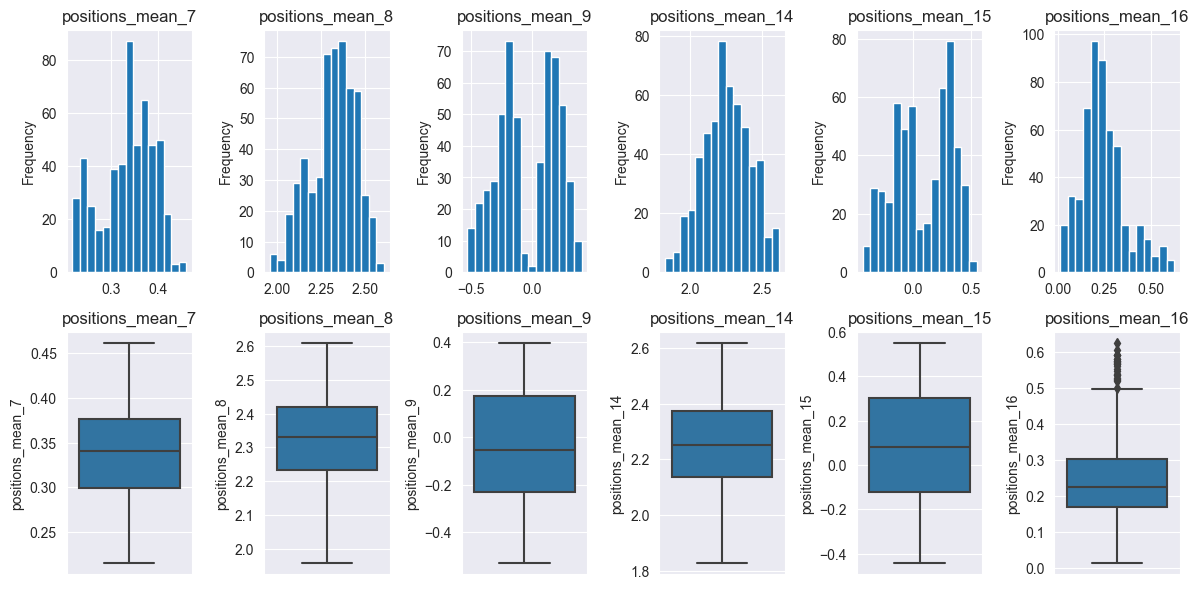

In [14]:
def plot_distributions_for_columns(dataframe, columns):
    figure, axes = plt.subplots(2, len(columns), figsize=(12, 6))

    for index, column in enumerate(columns):
        dataframe[column].plot(kind="hist", ax=axes[0, index], title=column, bins=15)
        sns.boxplot(y=dataframe[column], ax=axes[1, index]).set_title(column)

    plt.tight_layout()


plot_distributions_for_columns(training_features, columns_with_nulls.index)

The distributions are quite different, which mean we may need different imputation techniques for each column.
For example, the columns `positions_mean_9` and `positions_mean_15` are clearly not normal distributions and replacing missing values with the mean would likely not be ideal.
For instance in the case of `positions_mean_9` the mean is close to 0 where few other samples are, moreover this feature may even need to be split into two separate features as it appears to be the combination of two gaussian distributions.

Also, we do not know if the missing values themselves have a significance, i.e. we might want to create a separate column to indicate that a missing value is present or not. There are relatively few rows that have missing values, though, that may limit the usefulness of this technique and usefulness will also depend on the classifier used in the end.

For now, we will implement support for the following imputation strategies:
- Replacing with **mean**
- **Drop the rows** containing at least one missing value
- **K-Nearest Neighbour (KNN)** imputation, i.e. use the mean value of the K nearest neighbours

In [15]:
from sklearn.impute import KNNImputer, SimpleImputer


def impute(dataframe, imputer_class, **kwargs):
    imputer = imputer_class(**kwargs)
    dataframe = dataframe.copy()
    dataframe[dataframe.columns] = imputer.fit_transform(dataframe.values)
    return dataframe


def impute_knn(dataframe):
    return impute(dataframe, KNNImputer, n_neighbors=2, weights="uniform")


def impute_drop_rows(dataframe):
    return dataframe.dropna()


def impute_mean(dataframe):
    return impute(dataframe, SimpleImputer, missing_values=np.nan, strategy="mean")

Let's compare the mean and KNN imputation methods.

In [16]:
all_na_values = training_features.isna()

First let's execute both imputations individually.
Starting with the mean imputation, the imputed values are the following:

In [17]:
training_data_mean_imputed = impute_mean(training_features)
training_data_mean_imputed.values[all_na_values]

array([ 0.33458168,  2.31761983, -0.03841946,  0.33458168,  2.31761983,
       -0.03841946,  0.33458168,  2.31761983, -0.03841946,  0.33458168,
        2.31761983, -0.03841946,  2.25511306,  0.08066904,  0.24483198,
        2.25511306,  0.08066904,  0.24483198,  2.25511306,  0.08066904,
        0.24483198])

While the KNN-imputed values look like this:

In [18]:
training_data_knn_imputed = impute_knn(training_features)
training_data_knn_imputed.values[all_na_values]

array([ 0.34047311,  2.31943747,  0.28644774,  0.3482031 ,  2.39881444,
       -0.1273677 ,  0.35056898,  2.50631498,  0.39795417,  0.36853525,
        2.44980983, -0.2093955 ,  2.30348019,  0.1777522 ,  0.21750797,
        2.05630751,  0.31015251,  0.20072834,  2.31141073,  0.18122421,
        0.22825797])

### Comparison of mean and KNN
Now it is time to compare the results and visualize the differences on a histogram

(array([1., 1., 0., 2., 1., 4., 6., 3., 1., 2.]),
 array([-0.43637363, -0.37285571, -0.30933779, -0.24581987, -0.18230196,
        -0.11878404, -0.05526612,  0.0082518 ,  0.07176972,  0.13528763,
         0.19880555]),
 <BarContainer object of 10 artists>)

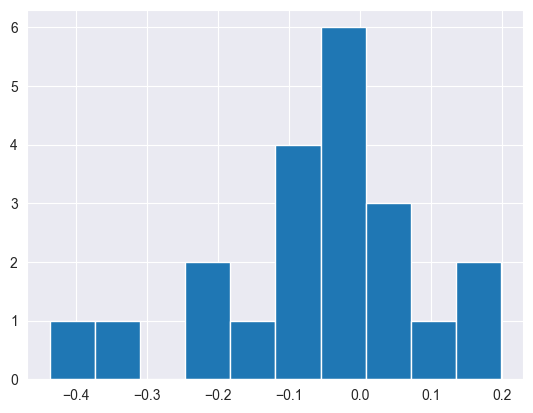

In [19]:
differences = (
    training_data_mean_imputed.values[all_na_values]
    - training_data_knn_imputed.values[all_na_values]
)
plt.hist(differences)

We can conclude that the differences between the methods are not significant, the mode is close to zero, for most of the missing values the two methods give very similar imputed values - more than half of the values are in the range [-0.1,0.1]

Now let's look at how the difference is distributed for each column using a boxplot and a swarm plot.

A **swarm plot** is a categorical scatter plot with points adjusted to be non-overlapping, also a good visual representation of the distribution of the differences.


/var/folders/f3/m7g1c2y17j1czlblqk67n9m80000gq/T/ipykernel_54196/2935449053.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90)


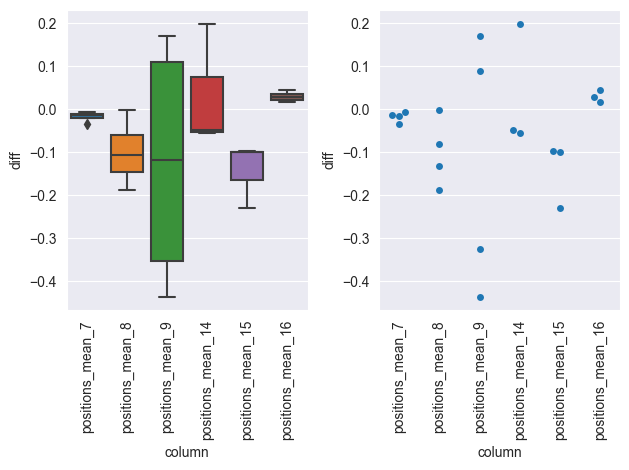

In [20]:
na_rows, na_columns = np.where(all_na_values)
dataframe_differences_columns = pd.DataFrame(
    {"diff": differences, "column": training_features.columns[na_columns]}
)

fig, axs = plt.subplots(ncols=2)

axis = sns.boxplot(x="column", data=dataframe_differences_columns, y="diff", ax=axs[0])
axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

axis = sns.swarmplot(
    x="column", data=dataframe_differences_columns, y="diff", ax=axs[1]
)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

fig.tight_layout()

When comparing the imputed values between the *mean* and *KNN* approaches, we see that they produce very similar values for columns `positions_mean_7` and `positions_mean_16` but larger differences by varying degrees for the other columns. The largest (absolute) deviance is for `positions_mean_9`.


Based on this it is likely that we may need to employ different imputation techniques depending on the column/feature.

For now, however, let's use KNN imputation and make sure that after the imputation there are no more missing values in our dataset. We will bring these three different methods into Task 2 of the project.


In [21]:
def run_missing_value_pipeline(dataframe, method="knn"):
    dataframe = dataframe.copy()

    columns_null_sum = dataframe.isnull().sum()
    columns_with_nulls = columns_null_sum[columns_null_sum > 0]

    if method == "knn":
        dataframe[columns_with_nulls.index] = impute_knn(
            dataframe[columns_with_nulls.index]
        )
    elif method == "mean":
        dataframe[columns_with_nulls.index] = impute_mean(
            dataframe[columns_with_nulls.index]
        )
    else:
        raise f"Unknown method {method}"

    assert dataframe.isnull().sum().sum() == 0

    return dataframe

### Scaling
First we will take a look at how the data looks by feature/column. While the dataset contains a lot of features, we can use a boxplot to get an overview understanding of how the different columns compare.

Let's make a boxplot again for every feature to get an overview of how they all relate in terms of range & centre. No need to have labels for the feature names, we just want to show all of them in one plot.

([<matplotlib.axis.XTick at 0x17ff67340>], [Text(1, 0, '')])

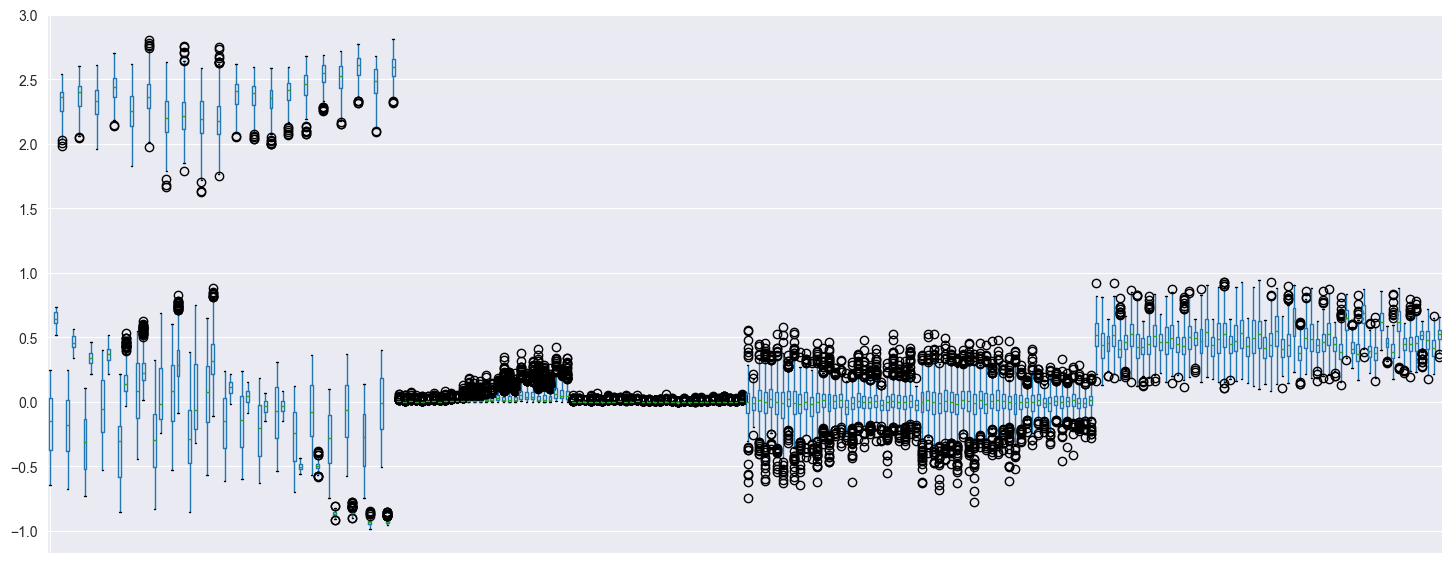

In [22]:
training_features.boxplot(figsize=(18, 7))
plt.xticks([1], [""])

The columns are clearly not all scaled to the same range and they have different means. As such a scaler that centers the mean and normalizes (scale to the variance) may be suitable. Let's use scikit's `StandardScaler` for this.

The `StandardScaler`normalizes the data so that the mean becomes zero, and the variance one, i.e. the scaled dataset follows a *standard* normal distribution.

In [23]:
def run_scaling_pipeline(dataframe):
    scaler = preprocessing.StandardScaler()
    scaled_values = scaler.fit_transform(dataframe.values)
    return pd.DataFrame(scaled_values)


training_features_scaled = run_scaling_pipeline(training_features)
training_features_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
count,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.360000e+02,5.360000e+02,5.360000e+02,...,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02
mean,-6.579099e-17,1.440823e-15,2.631640e-16,-2.960595e-17,1.430954e-16,2.526374e-15,-1.578984e-16,-5.302558e-17,1.643793e-15,-1.657049e-18,...,6.167906e-16,4.736952e-16,-1.513193e-16,-4.079042e-16,1.480297e-17,-6.315935e-16,1.052656e-15,5.000116e-16,-2.368476e-16,6.521532e-16
std,1.000927e+00,1.000927e+00,1.000927e+00,1.000927e+00,1.000927e+00,1.000927e+00,1.000927e+00,1.000934e+00,1.000934e+00,1.000934e+00,...,1.000927e+00,1.000927e+00,1.000927e+00,1.000927e+00,1.000927e+00,1.000927e+00,1.000927e+00,1.000927e+00,1.000927e+00,1.000927e+00
min,-2.041427e+00,-2.085063e+00,-3.528847e+00,-2.070288e+00,-1.989131e+00,-3.183453e+00,-1.768569e+00,-2.083456e+00,-2.760054e+00,-2.061541e+00,...,-2.864496e+00,-2.479966e+00,-3.466460e+00,-3.242184e+00,-2.971965e+00,-2.512175e+00,-4.289275e+00,-3.055138e+00,-2.378702e+00,-3.300937e+00
25%,-8.478049e-01,-5.407520e-01,-7.647389e-01,-7.839670e-01,-5.351656e-01,-7.833171e-01,-8.688168e-01,-6.199210e-01,-6.429888e-01,-8.021660e-01,...,-5.927029e-01,-6.751680e-01,-6.715362e-01,-6.072685e-01,-6.716183e-01,-7.471783e-01,-5.331013e-01,-6.634031e-01,-7.026072e-01,-6.921165e-01
50%,1.303612e-01,3.206465e-02,2.881063e-01,5.304253e-02,3.946783e-02,2.703312e-01,2.830323e-02,1.001306e-01,8.948403e-02,-6.898940e-02,...,3.138599e-02,-1.228017e-01,1.422307e-02,7.134794e-02,-5.854492e-02,-4.624693e-02,1.130916e-01,9.891353e-03,-2.468711e-02,3.252043e-02
75%,9.068591e-01,8.965148e-01,7.414239e-01,8.914699e-01,9.181127e-01,7.461087e-01,8.205131e-01,7.310186e-01,7.749583e-01,8.911096e-01,...,6.912928e-01,5.795860e-01,8.314249e-01,7.062413e-01,5.588170e-01,5.907767e-01,6.712873e-01,7.146333e-01,6.621734e-01,6.957913e-01
max,1.867119e+00,1.648211e+00,2.167300e+00,1.892501e+00,1.871421e+00,2.268403e+00,1.882960e+00,2.223480e+00,2.244383e+00,1.838724e+00,...,2.392104e+00,4.929437e+00,2.495670e+00,2.454085e+00,3.887352e+00,3.645716e+00,2.038827e+00,2.497579e+00,2.832253e+00,2.535093e+00


Looks good, i.e. the mean is about 0 and the standard deviation is around 1. All the columns have now been scaled. Let's rerun the boxplot.

([<matplotlib.axis.XTick at 0x280f8c7f0>], [Text(1, 0, '')])

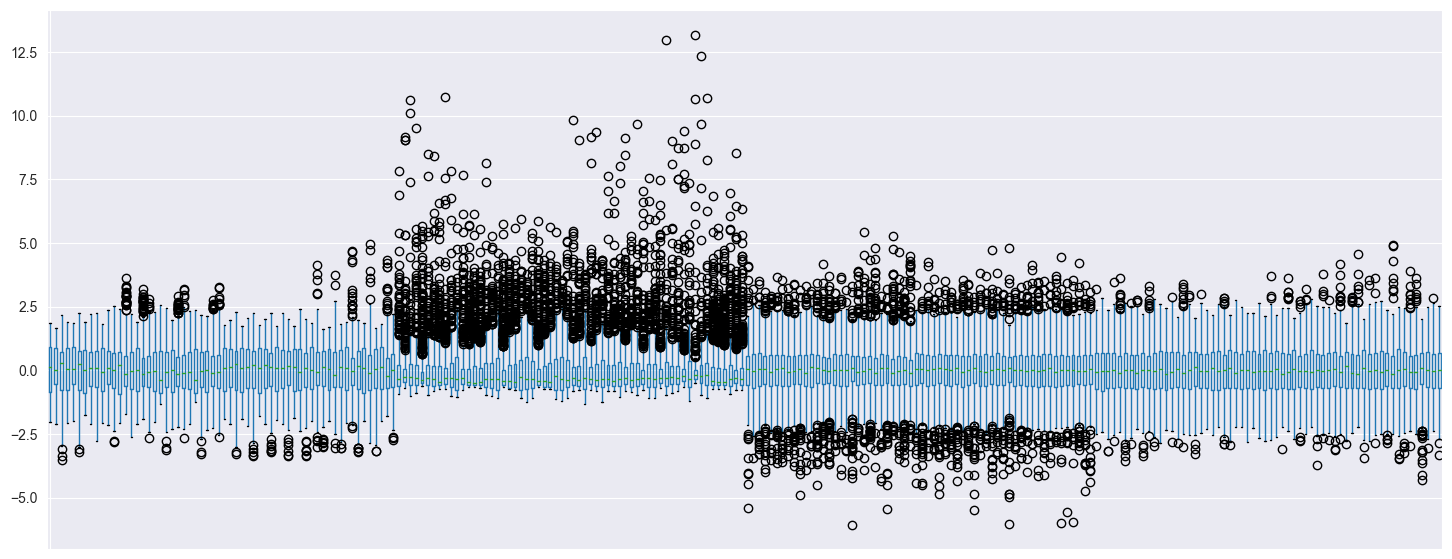

In [24]:
training_features_scaled.boxplot(figsize=(18, 7))
plt.xticks([1], [""])

We can see that the range of the different columns now matches, barring the outliers that were handled in another pipeline.

Let's put the three preprocessing methods all together.

## Pipeline

In the *Preprocessing* section above we have defined the pipeline methods needed for handling outliers, missing data and scaling. Let's put them all together.

Run the pipeline and re-run the boxplot on the resulting dataset

([<matplotlib.axis.XTick at 0x283521430>], [Text(1, 0, '')])

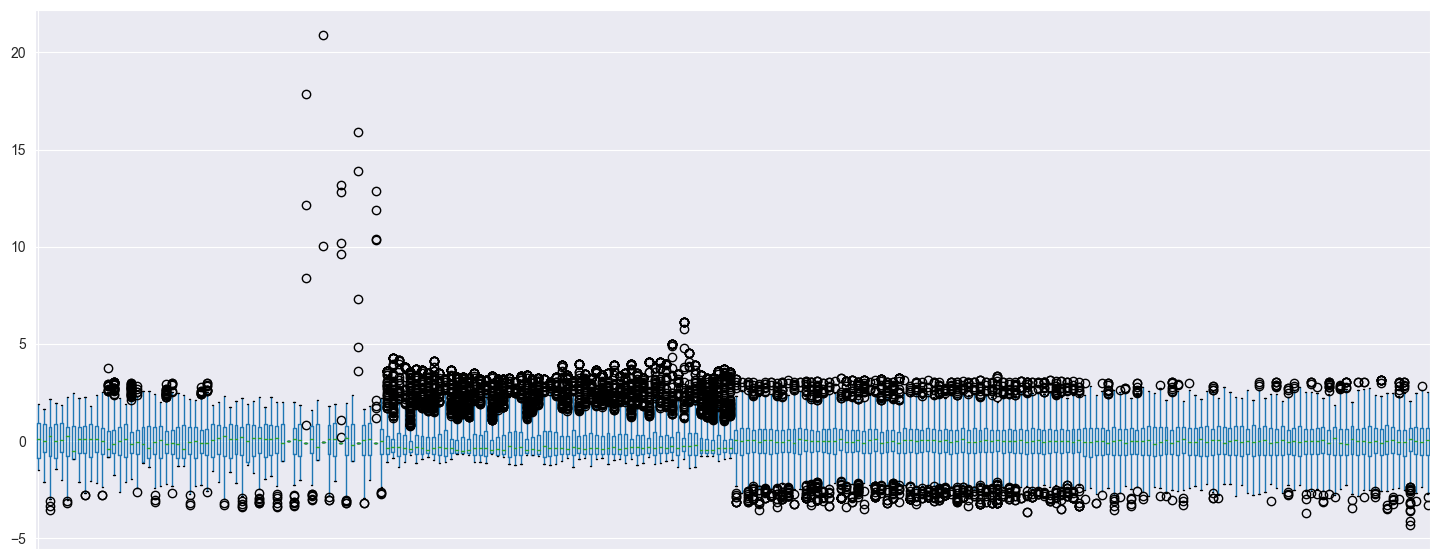

In [25]:
def run_data_pipeline(features, std_cap=3, impute_method="knn"):
    dataframe = run_outlier_handling_pipeline(features, std_cap=std_cap)
    dataframe = run_missing_value_pipeline(dataframe, method=impute_method)
    dataframe = run_scaling_pipeline(dataframe)

    return dataframe


training_data = run_data_pipeline(training_features)
training_data.boxplot(figsize=(18, 7))
plt.xticks([1], [""])

([<matplotlib.axis.XTick at 0x285a2a160>], [Text(1, 0, '')])

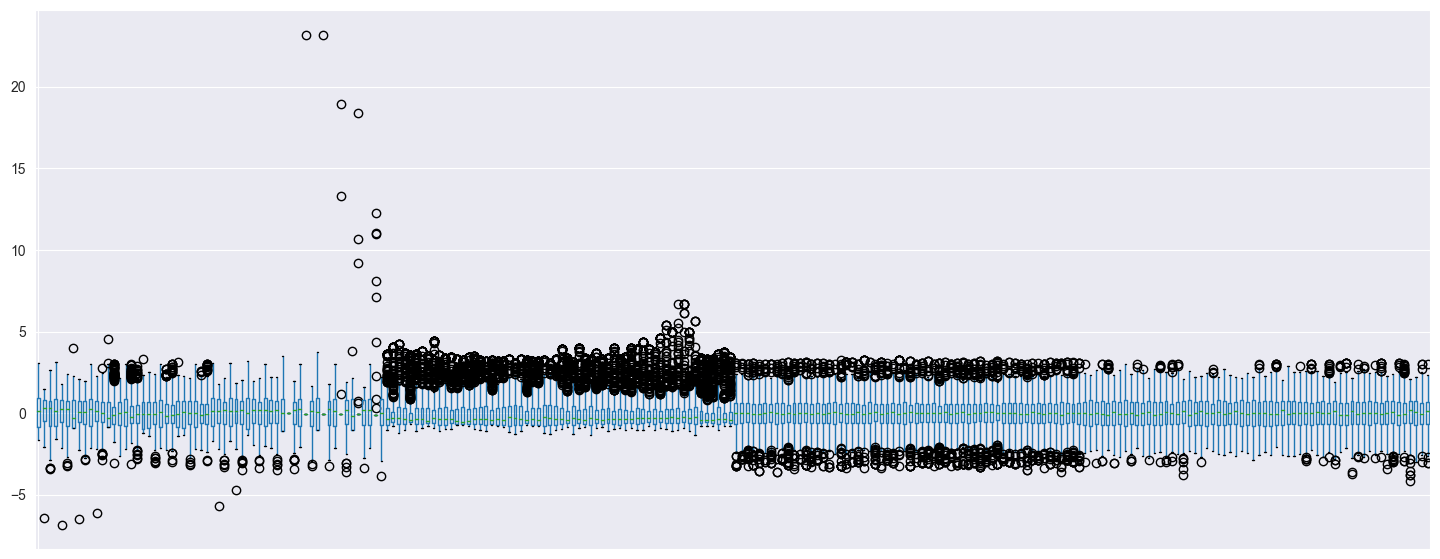

In [26]:
test_data = run_data_pipeline(test_features)
test_data.boxplot(figsize=(18, 7))
plt.xticks([1], [""])

# Task 2

The following observations have been made of the dataset and affects how models should be trained:

- There is a low number, less than 30, of samples per class. As such, overfitting will likely be a problem with more advanced classifiers like decision trees, for example. To address this, we will use a cross-validation (CV) method to evaluate the fit. Furthermore, to ensure we have the same distribution in each fold of the CV, a stratified fold method will be used.
  - A stratified fold means each set contains approximately the same percentage of samples of each target class as the complete set. (Source:
[Stratified k-fold](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold))

## Model selection
First we get a baseline score for some of the available classifiers in `scikit-learn`. The classifiers are imported from `scikit-learn` along with classification metrics for evaluation. The baseline scores are calculated using cross validation with 10 folds.

The selected classifiers are
- The mandatory ones
    - Decision tree
    - Random forest
    - Support vector machine
    - k-nearest neighbors
    - Multi-layer perceptron
- And a few others
    - Gaussian Naive Bayes classifier
    - Logistic regression

A few words about the other classifiers selected:
The Gaussian Naive Bayes classifier implements the *Gaussian Naive Bayes algorithm* for classification. The likelihood of the features is assumed to be Gaussian. The mean and standard deviation parameters are estimated using maximum likelihood.

Logistic regression, despite its name, is a linear model for *classification* rather than regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function. Logistic regression is implemented in `LogisticRegression`. This implementation can fit binary, One-vs-Rest, or multinomial logistic regression with optional regularization.

In [27]:
import warnings

warnings.filterwarnings("ignore")

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_validate


CLASSIFIERS_TASK_2 = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(kernel="linear"),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier(),
    # use dummy classifier to get a baseline
    DummyClassifier(strategy="most_frequent"),
]

### Training and evaluation on the training set

We create a function that trains and evaluates a model for each of the selected classifiers with default hyperparameters and run it on the complete training data set first.

We use the `cross_validate` function in `scikit-learn`. It allows specifying multiple metrics for evaluation.
It returns a dictionary containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.
We chose a 10-fold cross-validation, and the following metrics for scoring:
- `accuracy`: $\frac{T}{A}$, i.e. the ratio of true (correct) classifications to all classifications
- `precision_macro`: $pr=\frac{TP}{TP+FP}=\frac{TP}{P}$, i.e. the ratio of true positives to all the positive classifications
- `recall_macro`: $rec=\frac{TP}{TP+FN}=\frac{TP}{P}$, i.e the ratio of positive instances correctly classified
- `f1_macro`: $f_1=2\cdot\frac{pr\cdot rec}{pr+rec}$, i.e. the harmonic mean of the precision and the recall score

The `_macro` suffix means that the score is macro-averaged, i.e the metric are calculated for each label, and their unweighted mean is returned, label imbalances are not taken into account. Since there are no huge label imbalances in the dataset, this will suffice.

The function stores the means of the precision metrics on the test part of the dataset across all folds.

In [28]:
def evaluate_all_classifiers(training_data, classifiers):
    all_results = []
    scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]
    for classifier in classifiers:
        scores = cross_validate(
            classifier,
            training_data,
            training_labels,
            scoring=scoring,
            cv=10,
            return_train_score=True,
        )

        scores_mean = {metric: np.mean(scores[metric]) for metric in scores.keys()}
        scores_mean["classifier"] = classifier.__class__.__name__
        all_results.append(pd.DataFrame([scores_mean]))

    return pd.concat(all_results)

Now we can run the selected classifiers and evaluate them

In [29]:
results = evaluate_all_classifiers(training_data, CLASSIFIERS_TASK_2)

### Baseline scores

In [30]:
results.sort_values(by=["test_accuracy"])

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,classifier
0,0.000546,0.001543,0.046296,0.046296,0.001543,0.001543,0.033333,0.033333,0.002945,0.002950,DummyClassifier
0,0.001743,0.005648,0.455556,0.757819,0.435552,0.812741,0.453333,0.751637,0.413778,0.758285,KNeighborsClassifier
0,0.066651,0.002848,0.583333,1.000000,0.541056,1.000000,0.580556,1.000000,0.537413,1.000000,DecisionTreeClassifier
0,0.002905,0.003194,0.700000,0.938272,0.695810,0.951422,0.713333,0.944021,0.676169,0.940361,GaussianNB
0,0.876288,0.003306,0.757407,1.000000,0.743778,1.000000,0.754444,1.000000,0.725976,1.000000,MLPClassifier
0,0.043897,0.004640,0.822222,1.000000,0.817722,1.000000,0.818889,1.000000,0.802143,1.000000,SVC
0,0.476135,0.007624,0.825926,1.000000,0.814444,1.000000,0.823333,1.000000,0.798143,1.000000,LogisticRegression
0,0.304380,0.005753,0.861111,1.000000,0.849500,1.000000,0.859444,1.000000,0.835341,1.000000,RandomForestClassifier


### Conclusion
Let's compare the baseline metrics! The metrics on the training part of the data can be disregarded.
The `RandomForestClassifier` leads on all 4 scoring metric, with an accuracy of approximately 0.86, followed by `LogisticRegression` and the `MLPClassifier`. The `KNeighborsClassifier` and the `DecisionTreeClassifier` performed rather poorly.

The `fit_time` values are less important, but also informative. The better-performing classifiers took significantly longer to fit to the dataset, by 1-2 magnitudes.

## Fine-tuning models

Next step is to find optimal hyperparameters for the best performing classifier, `RandomForestClassifier`. We will do so by doing a CV Grid Search and will tune the following hyperparameters of the classifier:

- `n_estimators`: controls the number of trees in the forest. The default value is 100, so we will probe around that value.
- `max_depth`: the maximum depth of the tree. The default value is None, i.e. the max depth is not restricted so we first test a wide range.
- `bootstrap`: whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

In [31]:
parameter_grid = {
    "n_estimators": np.arange(95, 105, 1),
    "max_depth": np.arange(5, 50, 5),
    "bootstrap": [False, True],
}

As we mentioned before, we're using a stratified fold with cross-validation. Since we established that all four metrics gave similar results, let's stick to accuracy for now. In order to produce reproducible results, the random state is fixed to a set number.

In [32]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


def fit_grid_search_cross_validation(parameter_grid, dataset, labels):
    searchCV = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        scoring="accuracy",
        cv=StratifiedKFold(n_splits=10),
        param_grid=parameter_grid,
        verbose=True,
        n_jobs=4,
    )
    searchCV.fit(dataset, labels)
    return searchCV

In [33]:
searchCV = fit_grid_search_cross_validation(
    parameter_grid, training_data, training_labels
)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


This gives the following best parameters to use in the evaluation on the test set:

In [34]:
best_params1, best_score1 = searchCV.best_params_, searchCV.best_score_
best_params1, best_score1

({'bootstrap': False, 'max_depth': 25, 'n_estimators': 96}, 0.9037037037037038)

The optimal number of estimators (trees) is close to the default value and in the middle of the probed range.
It also seems like using the whole dataset to build each tree is beneficial. Let's do one more grid search to find the ideal `max_depth` value:


In [35]:
parameter_grid = {
    "n_estimators": [best_params1["n_estimators"]],
    "max_depth": np.arange(11, 19, 1),
    "bootstrap": [best_params1["bootstrap"]],
}
searchCV2 = fit_grid_search_cross_validation(
    parameter_grid, training_data, training_labels
)
best_params2, best_score2 = searchCV2.best_params_, searchCV2.best_score_
best_params2, best_score2

Fitting 10 folds for each of 8 candidates, totalling 80 fits


({'bootstrap': False, 'max_depth': 17, 'n_estimators': 96}, 0.8981481481481483)

The ideal maximum depth of the tree is 17, this is the model we're going to evaluate.

## Evaluation on the test set

### Choice of models to evaluate

We choose to evaluate the the models with the top five `test_accuracy` from the model selection section:

1.   `RandomForestClassifier`
2.   `LogisticRegression`
3.   `MLPClassifier`
4.   `SVC`
5.   `GaussianNB`

After these five models the accuracy starts to drop off a bit. However, due to the requirements of the project task we evaluated `KNeighborsClassifiers` and `DecisionTreeClassifier` as well.

### Evaluation

We
- fit the models to the preprocessed training set,
- run predictions on the test set (run through the same preprocessing)
- and use `accuracy_score` from `sklearn.metrics` to get the final accuracy scores.

In [137]:
from sklearn.metrics import accuracy_score


def evaluate_models(
    training_features, training_labels, test_features, test_labels, classifiers
):
    prediction_scores = {}
    for index, classifier in enumerate(classifiers):
        classifier.fit(training_features, training_labels)
        prediction = classifier.predict(test_features)
        prediction_scores[classifier.__class__.__name__] = accuracy_score(
            test_labels, prediction
        )
    return prediction_scores


class RandomForestClassifierFinetuned(RandomForestClassifier):
    def __init__(self):
        RandomForestClassifier.__init__(
            self,
            n_estimators=99,
            max_depth=15,
            random_state=42,
            bootstrap=False,
        )


CLASSIFIERS_TASK2_TO_EVALUATE = [
    RandomForestClassifier(),
    RandomForestClassifierFinetuned(),
    LogisticRegression(),
    MLPClassifier(),
    SVC(kernel="linear"),
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
]

prediction_scores = evaluate_models(
    training_data,
    training_labels,
    test_data,
    test_labels,
    CLASSIFIERS_TASK2_TO_EVALUATE,
)
prediction_scores

{'RandomForestClassifier': 0.8851851851851852,
 'RandomForestClassifierFinetuned': 0.9111111111111111,
 'LogisticRegression': 0.8185185185185185,
 'MLPClassifier': 0.762962962962963,
 'SVC': 0.8444444444444444,
 'GaussianNB': 0.7314814814814815,
 'KNeighborsClassifier': 0.4537037037037037,
 'DecisionTreeClassifier': 0.6648148148148149}

As we expected the random forest classifier with the fine-tuned hyperparameters produced the highest accuracy on the test set!

Let's plot the performance (accuracy) of the classifiers on the train vs test dataset.
In order to do that we first concatenate the cross-validation score of the improved random forest model to the existing results.

In [138]:
N = len(CLASSIFIERS_TASK2_TO_EVALUATE)

training_results = pd.concat(
    [
        results,
        pd.DataFrame(
            [
                {
                    "classifier": "RandomForestClassifierFinetuned",
                    "test_accuracy": searchCV2.best_score_,
                }
            ]
        ),
    ]
)
training_results = training_results.set_index("classifier")

And now everything is in place to draw the plot to compare the results

In [139]:
classifier_names = [
    classifier.__class__.__name__ for classifier in CLASSIFIERS_TASK2_TO_EVALUATE
]
training_accuracy_scores = training_results.loc[classifier_names][
    "test_accuracy"
].values
test_accuracy_scores = [prediction_scores[c] for c in classifier_names]

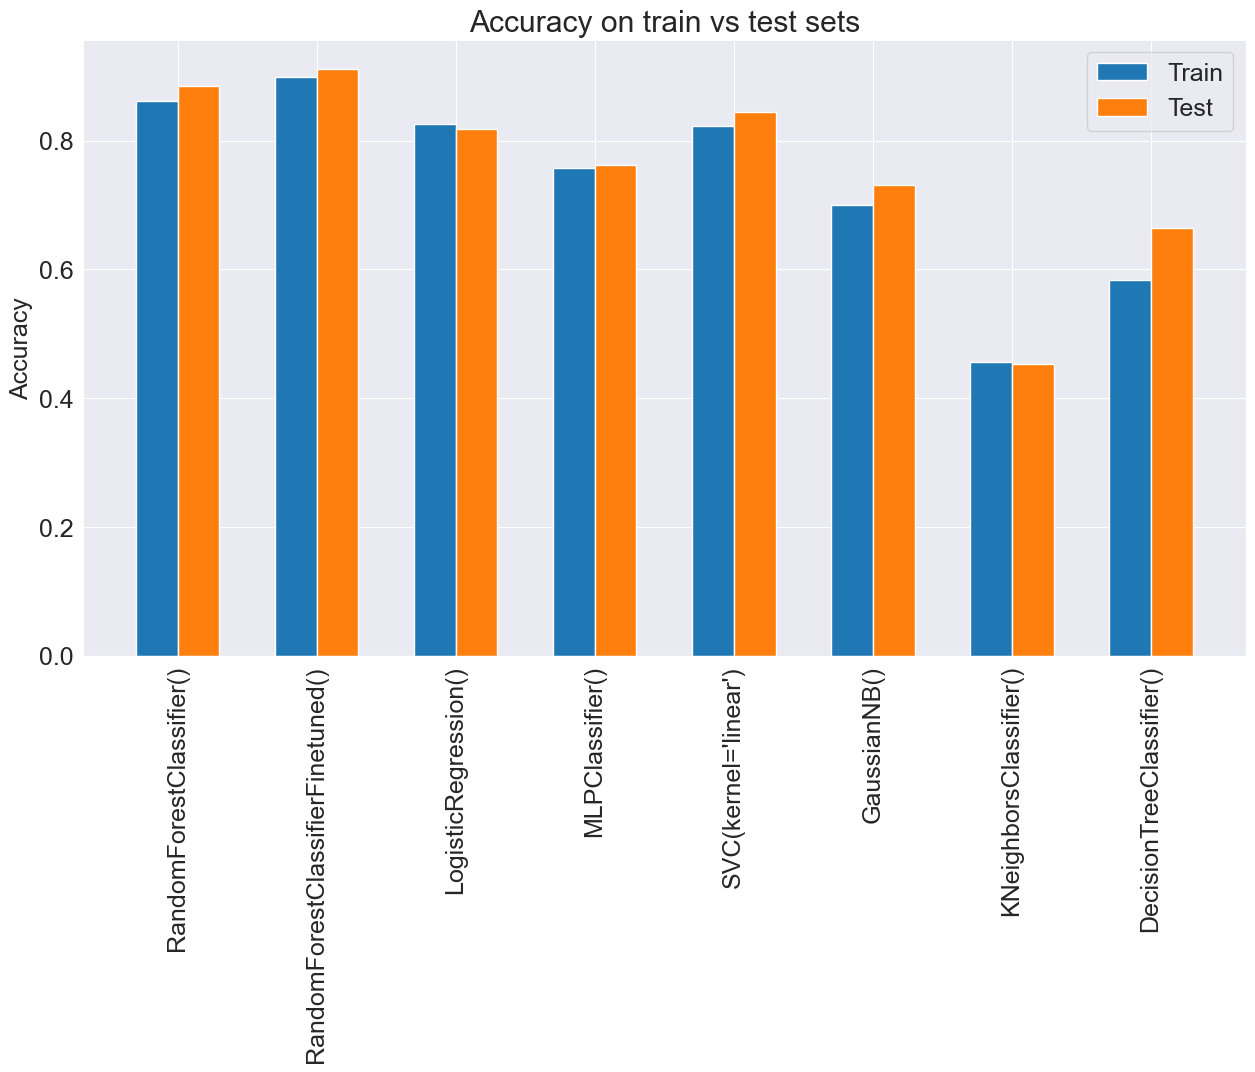

In [140]:
index = np.arange(N)

plt.figure(figsize=(15, 8))
BAR_WIDTH = 0.3

plt.bar(index, training_accuracy_scores, BAR_WIDTH, label="Train")
plt.bar(index + BAR_WIDTH, test_accuracy_scores, BAR_WIDTH, label="Test")

plt.ylabel("Accuracy")
plt.title("Accuracy on train vs test sets")
plt.xticks(
    index + BAR_WIDTH / 2,
    tuple(CLASSIFIERS_TASK2_TO_EVALUATE),
    rotation=90,
)
plt.legend(loc="best")
plt.show()

### Conclusion

The prediction scores for the test set and the scores from the training were fairly close. The use of Cross Validation (and a high number of folds = 10) gave a good estimation of the performance on an unseen dataset.

The best performing (in terms of accuracy) classifier on both train & test datasets was the `RandomForestClassifier`, which seems to neither be over- or underfiting, as the scores on both the training and test data are pretty close.

The tuned `RandomForestClassifier` does perform a bit better than the model with standard hyperparameters, it could perhaps be even better with some more tuning and feature reduction, as we will see in Task 3. On the other hand, more tuning could also risk overfitting it to the test set, which is why it's probably best to leave it as is.

# Task 3

The dataset is very *wide* - that is, there are a very large amount of features (240) compared to the number of samples (540). To address this, a feature reduction will be used. There are many options for reducing features, such as removing features with strong correlation, low variance or fitting a classifier and removing those features that have low importance. Dimensionality reduction approaches are also common, such as *Principal Component Analysis* (PCA), for example.
- We will compare *recursive feature elimination* (RFE) to PCA, and select the best-performing option.

## Feature reduction

### Recursive feature elimination

To reduce features, we have selected a **Recursive Feature Elimination** (RFE) method using a Support Vector Machine classifier. The reason for selecting a SVM classifier is the combination of speed and the ability to capture non-linearities in the dataset.

Given an external estimator that assigns weights to features, the goal of RFE is to select features by recursively considering smaller and smaller sets of features.
- First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable.
- Then, the least important features are pruned from current set of features.
- That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.
- RFECV performs RFE in a cross-validation loop to find the optimal number of features.

In [40]:
from sklearn.feature_selection import RFECV


training_data = run_data_pipeline(training_features, std_cap=6, impute_method="mean")


def reduce(minimum_number_features, dataframe):
    rfe_selector = RFECV(
        estimator=SVC(kernel="linear"),
        cv=StratifiedKFold(n_splits=10),
        min_features_to_select=minimum_number_features,
        step=1,
        n_jobs=4,
    )

    rfe_selector.fit(dataframe, training_labels)
    selected_columns = dataframe.columns[rfe_selector.get_support()]
    score = np.mean(rfe_selector.cv_results_["mean_test_score"])

    return selected_columns, score

Since the RFE takes a while, let's evaluate only a few different minimum features to select, and see which one ends up with the highest cross-validation score:

In [41]:
rfe_results = []
for minimum_number_features in [15, 45]:
    selected_columns, score = reduce(minimum_number_features, training_data)
    print(minimum_number_features, len(selected_columns), score)
    rfe_results.append((selected_columns, score))

15 40 0.8510980006555228
45 47 0.8458049886621315


As seen above, the cross-validated performance peaks at 40 selected features, at around an accuracy of 0.851.

### Prinicipal component analysis

Let's also look at how principal component analysis (PCA) would perform, also evaluating it using the same SVM classifiers as in the RFE case and same amount of CV folds, that is 10.
The code below is based on [sklearn example](https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html)

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, PCA is implemented as a transformer object that learns  components in its fit method, and can be used on new data to project it on these components.
(Source: [sklearn user guide](https://scikit-learn.org/stable/modules/decomposition.html#pca))

Let's run PCA through a grid search with cross-validation, varying the number of components from 10 to 100 by increments of 5.


In [43]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


parameter_grid = {"pca__n_components": np.arange(10, 100, 5)}


def fit_pca_grid_search(parameter_grid):
    pipeline = Pipeline(steps=[("pca", PCA()), ("svm", SVC(kernel="linear"))])
    search = GridSearchCV(pipeline, parameter_grid, cv=10, n_jobs=4)
    search.fit(training_data, training_labels)

    return search


grid_search = fit_pca_grid_search(parameter_grid)
print(f"Best parameter (CV score={grid_search.best_score_:.3f}):")
print(grid_search.best_params_)

Best parameter (CV score=0.804):
{'pca__n_components': 85}


Using PCA, we achieve the highest accuracy on the same cross-validated classifiers as RFE above using 85 PCA components.

### Conclusion

The RFE approach gives us higher accuracy with fewer features than PCA, so we will continue to evaluate it alongside the PCA which is mandated by the task requirements.

In [44]:
rfe_best_index = np.argmin([score for _, score in rfe_results])
rfe_columns, _ = rfe_results[rfe_best_index]

rfe_reduced_training_data = training_data[training_data.columns[rfe_columns]]
rfe_reduced_test_data = test_data[test_data.columns[rfe_columns]]

In [45]:
best_pca = grid_search.best_estimator_.steps[0][1]

In [46]:
pca_reduced_training_data = best_pca.transform(training_data)
pca_reduced_test_data = best_pca.transform(test_data)

### Applying PCA on different classifiers

Now we can run the selected classifiers from Task 2 on the dataset with reduced features (through PCA) and evaluate them

In [47]:
pca_transformed_results = evaluate_all_classifiers(
    pca_reduced_training_data, CLASSIFIERS_TASK_2
)

In [48]:
pca_transformed_results.sort_values(by=["test_accuracy"])

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,classifier
0,0.000314,0.001308,0.046296,0.046296,0.001543,0.001543,0.033333,0.033333,0.002945,0.002950,DummyClassifier
0,0.035886,0.001514,0.261111,1.000000,0.230722,1.000000,0.260000,1.000000,0.228595,1.000000,DecisionTreeClassifier
0,0.000412,0.002733,0.457407,0.746091,0.439948,0.802148,0.448333,0.739109,0.413130,0.745081,KNeighborsClassifier
0,0.001301,0.001873,0.600000,0.984568,0.619142,0.987019,0.591111,0.985248,0.576020,0.985566,GaussianNB
0,0.246577,0.005314,0.605556,1.000000,0.568119,1.000000,0.598333,1.000000,0.553204,1.000000,RandomForestClassifier
0,0.754153,0.002799,0.753704,1.000000,0.744444,1.000000,0.752222,1.000000,0.725095,1.000000,MLPClassifier
0,0.190256,0.002160,0.787037,1.000000,0.786889,1.000000,0.788889,1.000000,0.765690,1.000000,LogisticRegression
0,0.020822,0.002411,0.809259,1.000000,0.813389,1.000000,0.806667,1.000000,0.791111,1.000000,SVC


We got quite different results compared to the original training set.
This time the `SVC` (support vector classifier) with a linear kernel performed best across all metrics, followed by `LogisticRegression`, `MLPClassifier` and only then the `RandomForestClassifier`.

What is more intriguing, however, that all the classifiers performed worse than without applying PCA to the training dataset! PCA is a linear technique, so it can lead to worse results when trying to explore nonlinear relationships.

### Evaluation on the test set

Let's evaluate the models from Task 2 on the PCA-transformed dataset:

We fit the models to the preprocessed and feature-reduced training set, run predictions on the test set run through the same preprocessing and feature reduction and use `accuracy_score` from `sklearn.metrics` to get the final accuracy scores.

In [141]:
pca_prediction_scores = evaluate_models(
    pca_reduced_training_data,
    training_labels,
    pca_reduced_test_data,
    test_labels,
    CLASSIFIERS_TASK2_TO_EVALUATE,
)
pca_prediction_scores

{'RandomForestClassifier': 0.6648148148148149,
 'RandomForestClassifierFinetuned': 0.6685185185185185,
 'LogisticRegression': 0.7722222222222223,
 'MLPClassifier': 0.7611111111111111,
 'SVC': 0.8203703703703704,
 'GaussianNB': 0.6222222222222222,
 'KNeighborsClassifier': 0.46111111111111114,
 'DecisionTreeClassifier': 0.28888888888888886}

If we can recall, the prediction scores are lower than without applying PCA to the dataset. Let's plot the performance (accuracy) of the classifiers on the train vs test dataset.

In [142]:
def fit_and_predict(classifier, training_data, training_labels, test_data):
    classifier.fit(training_data, training_labels)
    prediction = classifier.predict(test_data)
    print(classifier.__class__.__name__, accuracy_score(test_labels, prediction))
    return prediction


def get_pca_comparison_results(classifiers):
    pca_comparison_results = []
    for classifier in classifiers:
        prediction_no_pca = fit_and_predict(
            classifier,
            training_data,
            training_labels,
            test_data,
        )

        prediction_pca = fit_and_predict(
            classifier,
            pca_reduced_training_data,
            training_labels,
            pca_reduced_test_data,
        )

        pca_comparison_results.append(
            {
                "classifier": classifier.__class__.__name__,
                "test_accuracy": accuracy_score(test_labels, prediction_no_pca),
                "test_accuracy_pca": accuracy_score(test_labels, prediction_pca),
            }
        )
    pca_comparison_results = pd.DataFrame(pca_comparison_results)
    pca_comparison_results = pca_comparison_results.set_index("classifier")
    return pca_comparison_results

In [143]:
pca_comparison_results = get_pca_comparison_results(CLASSIFIERS_TASK2_TO_EVALUATE)

RandomForestClassifier 0.8944444444444445
RandomForestClassifier 0.6481481481481481
RandomForestClassifierFinetuned 0.9111111111111111
RandomForestClassifierFinetuned 0.6685185185185185
LogisticRegression 0.8185185185185185
LogisticRegression 0.7722222222222223
MLPClassifier 0.762962962962963
MLPClassifier 0.7555555555555555
SVC 0.8444444444444444
SVC 0.8203703703703704
GaussianNB 0.7314814814814815
GaussianNB 0.6222222222222222
KNeighborsClassifier 0.4537037037037037
KNeighborsClassifier 0.46111111111111114
DecisionTreeClassifier 0.6537037037037037
DecisionTreeClassifier 0.2740740740740741


And now everything is in place to draw the plot to compare the results

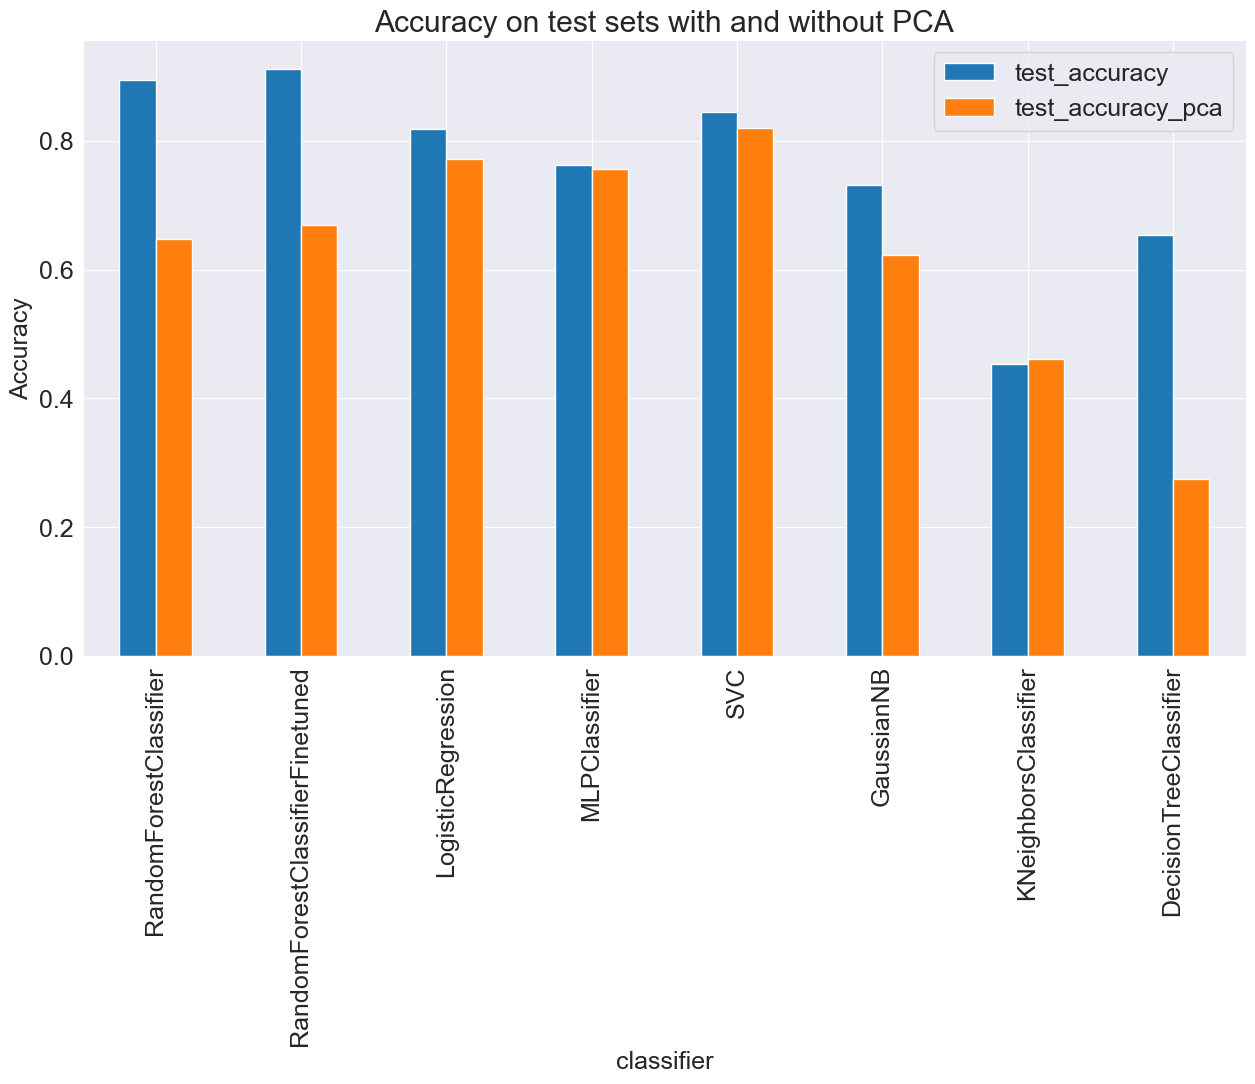

In [144]:
pca_comparison_results.plot(kind="bar", figsize=(15, 8))
plt.ylabel("Accuracy")
plt.title("Accuracy on test sets with and without PCA")
plt.rc("font", size=18)
plt.show()

From this plot we can also draw the same conclusion, PCA did not help with the performance; it resulted in a slight decrease in accuracy for the linear models, and a significant drop in the case of `RandomForestClassifier` for instance.

## Ensemble methods

### Model selection
We chose the following ensemble classifiers
- `GradientBoostingClassifier`
- `AdaBoostClassifier`
- `BaggingClassifier`
- `ExtraTreesClassifier`
`RandomForestClassifier` was already discussed in Task 2.

`GradientBoostingClassifier` is excluded from the later discussions, because it took much longer time than the others to converge while not giving better results.

The first three were discussed in detail during the lectures and labs, but `ExtraTreesClassifier` deserves a few extra words. It is an extremely randomized ensemble classifier, randomness goes one step further in the way splits are computed.
- As in random forests, a random subset of candidate features is used,
- but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule.
- This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias.

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier


CLASSIFIERS_TASK_3 = [
    # GradientBoostingClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
]

### Training and evaluation on the training set

Now we can run the selected classifiers and evaluate them

In [56]:
ensemble_results = evaluate_all_classifiers(training_data, CLASSIFIERS_TASK_3)

### Baseline scores

In [103]:
ensemble_results.sort_values(by=["test_accuracy"])

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,classifier
0,0.519416,0.005131,0.118519,0.143210,0.042010,0.104765,0.108333,0.127672,0.046686,0.069283,AdaBoostClassifier
0,0.368649,0.003071,0.764815,0.997531,0.759984,0.997845,0.767778,0.997390,0.738444,0.997547,BaggingClassifier
0,0.108789,0.006034,0.894444,1.000000,0.878611,1.000000,0.889444,1.000000,0.870595,1.000000,ExtraTreesClassifier


### Conclusion
Let's compare the baseline metrics! The metrics on the training part of the data can be disregarded.
The `ExtraTreesClassifier` leads on all 4 scoring metric, with an accuracy of approximately 0.89, followed by `BaggingClassifier` and the very slow `GradientBoostingClassifier`. The `AdaBoostClassifier` performed extremely poorly.

## Fine-tuning models

Next step is to find optimal hyperparameters for the best performing classifier, `ExtraTrees`. We will do so by doing a CV Grid Search and will tune the following hyperparameters of the classifier:

- `n_estimators`: controls the number of trees in the forest. The default value is 100, so we will probe around that value.
- `max_depth`: the maximum depth of the tree. The default value is None, i.e. the max depth is not restricted so we first test a wide range.
- `bootstrap`: whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

In [104]:
parameter_grid = {
    "n_estimators": np.arange(95, 105, 1),
    "max_depth": np.arange(15, 20, 1),
    "bootstrap": [False, True],
}

As we mentioned before, we're using a stratified fold with cross-validation. Since we established that all four metrics gave similar results, let's stick to accuracy for now. In order to produce reproducible results, the random state is fixed to a set number.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


def fit_grid_search_cross_validation(parameter_grid, dataset, labels):
    searchCV = GridSearchCV(
        estimator=ExtraTreesClassifier(random_state=42),
        scoring="accuracy",
        cv=StratifiedKFold(n_splits=10),
        param_grid=parameter_grid,
        verbose=True,
        n_jobs=4,
    )
    searchCV.fit(dataset, labels)
    return searchCV

In [ ]:
searchCV = fit_grid_search_cross_validation(
    parameter_grid, training_data, training_labels
)

This gives the following best parameters to use in the evaluation on the test set:

In [105]:
best_params1, best_score1 = searchCV.best_params_, searchCV.best_score_
best_params1, best_score1

({'bootstrap': False, 'max_depth': 15, 'n_estimators': 99}, 0.8981481481481481)

The ideal maximum depth of the tree is 18, this is the model we're going to evaluate.

In [106]:
best_params1, best_score1 = searchCV.best_params_, searchCV.best_score_
best_params1, best_score1

({'bootstrap': False, 'max_depth': 15, 'n_estimators': 99}, 0.8981481481481481)

The ideal maximum depth of the tree is 15, this is the model we're going to evaluate.

We choose to evaluate the models with the top three `test_accuracy` from the model selection section:

- `ExtraTreesClassifier`
- `ExtraTreesClassifier`with fine-tuned parameters
- `BaggingClassifier`

We
- fit the models to the preprocessed training set,
- run predictions on the test set (run through the same preprocessing)
- and use `accuracy_score` from `sklearn.metrics` to get the final accuracy scores.

In [107]:
from sklearn.metrics import accuracy_score


class ExtraTreesClassifierFineTuned(ExtraTreesClassifier):
    def __init__(self):
        ExtraTreesClassifier.__init__(
            self,
            n_estimators=best_params1["n_estimators"],
            max_depth=best_params1["max_depth"],
            random_state=42,
            bootstrap=False,
        )


CLASSIFIERS_TASK3_TO_EVALUATE = [
    AdaBoostClassifier(),
    ExtraTreesClassifierFineTuned(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    # GradientBoostingClassifier(),
]

prediction_scores = evaluate_models(
    training_data,
    training_labels,
    test_data,
    test_labels,
    CLASSIFIERS_TASK3_TO_EVALUATE,
)
prediction_scores

{'AdaBoostClassifier': 0.07592592592592592,
 'ExtraTreesClassifierFineTuned': 0.8870370370370371,
 'ExtraTreesClassifier': 0.9074074074074074,
 'BaggingClassifier': 0.7907407407407407}

Somewhat surprisingly, the fine-tuned extra trees classifier performed worse on the test dataset than the original, meaning it suffers from overfitting. The results are otherwise as expected.

Let's plot the performance (accuracy) of the classifiers on the train vs test dataset.
In order to do that we first concatenate the cross-validation score of the improved random forest model to the existing results.

In [108]:
N = len(CLASSIFIERS_TASK3_TO_EVALUATE)

training_results = pd.concat(
    [
        ensemble_results,
        pd.DataFrame(
            [
                {
                    "classifier": "ExtraTreesClassifierFineTuned",
                    "test_accuracy": searchCV.best_score_,
                }
            ]
        ),
    ]
)
training_results = training_results.set_index("classifier")
training_results

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro
classifier,,,,,,,,,,
AdaBoostClassifier,0.519416,0.005131,0.118519,0.143210,0.042010,0.104765,0.108333,0.127672,0.046686,0.069283
BaggingClassifier,0.368649,0.003071,0.764815,0.997531,0.759984,0.997845,0.767778,0.997390,0.738444,0.997547
ExtraTreesClassifier,0.108789,0.006034,0.894444,1.000000,0.878611,1.000000,0.889444,1.000000,0.870595,1.000000
ExtraTreesClassifierFineTuned,NaN,NaN,0.898148,NaN,NaN,NaN,NaN,NaN,NaN,NaN


And now everything is in place to draw the plot to compare the results

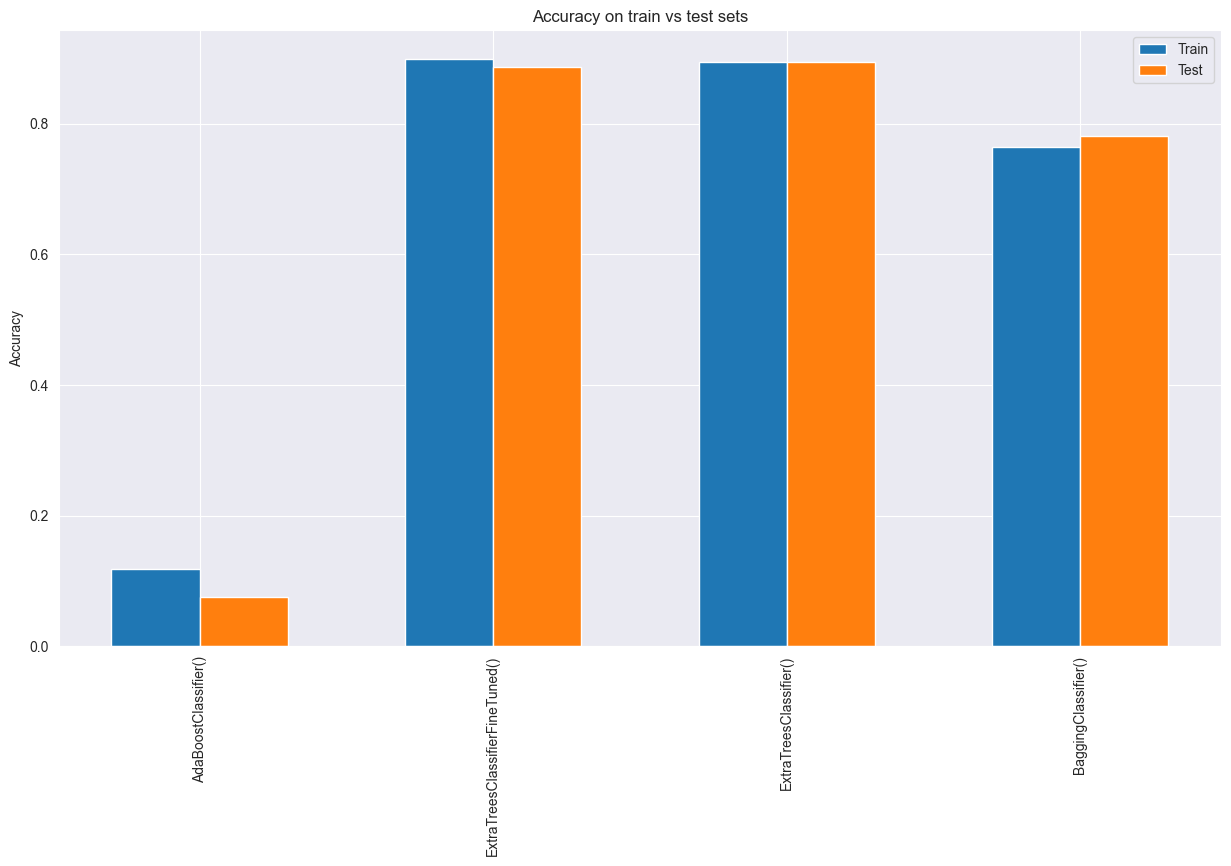

In [109]:
index = np.arange(N)

plt.figure(figsize=(15, 8))
BAR_WIDTH = 0.3

plt.bar(index, training_accuracy_scores, BAR_WIDTH, label="Train")
plt.bar(index + BAR_WIDTH, test_accuracy_scores, BAR_WIDTH, label="Test")

plt.ylabel("Accuracy")
plt.title("Accuracy on train vs test sets")
plt.xticks(
    index + BAR_WIDTH / 2,
    tuple(CLASSIFIERS_TASK3_TO_EVALUATE),
    rotation=90,
)
plt.legend(loc="best")
plt.show()

In [110]:
classifier_names = [
    classifier.__class__.__name__ for classifier in CLASSIFIERS_TASK3_TO_EVALUATE
]
training_accuracy_scores = training_results.loc[classifier_names][
    "test_accuracy"
].values
test_accuracy_scores = [prediction_scores[c] for c in classifier_names]

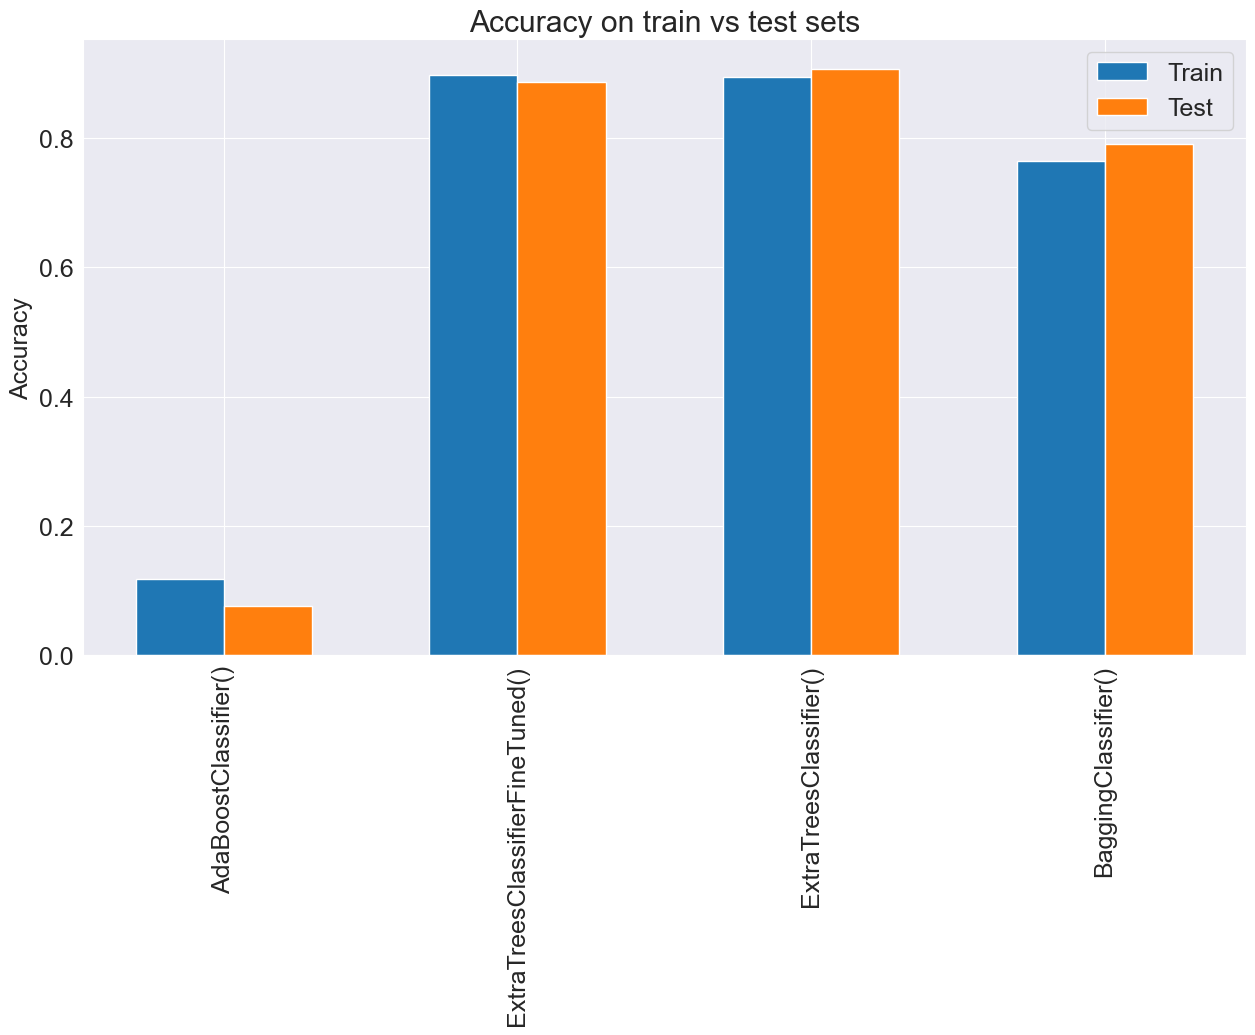

In [134]:
index = np.arange(N)

plt.figure(figsize=(15, 8))
BAR_WIDTH = 0.3

plt.bar(index, training_accuracy_scores, BAR_WIDTH, label="Train")
plt.bar(index + BAR_WIDTH, test_accuracy_scores, BAR_WIDTH, label="Test")

plt.ylabel("Accuracy")
plt.title("Accuracy on train vs test sets")
plt.xticks(
    index + BAR_WIDTH / 2,
    tuple(CLASSIFIERS_TASK3_TO_EVALUATE),
    rotation=90,
)
plt.legend(loc="best")
plt.rc("font", size=18)
plt.show()

## Applying ensemble methods along with PCA

Let's run the selected ensemble classifiers on the dataset with reduced features (through PCA) and evaluate them

In [112]:
pca_transformed_ensemble_results = evaluate_all_classifiers(
    pca_reduced_training_data, CLASSIFIERS_TASK_3
)

In [113]:
pca_transformed_ensemble_results.sort_values(by=["test_accuracy"])

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,classifier
0,0.212648,0.003758,0.100000,0.108025,0.044523,0.065054,0.088333,0.096862,0.048479,0.059336,AdaBoostClassifier
0,0.194885,0.002014,0.387037,0.996708,0.347183,0.997136,0.383889,0.996862,0.342111,0.996906,BaggingClassifier
0,0.092214,0.005675,0.668519,1.000000,0.667087,1.000000,0.665000,1.000000,0.636214,1.000000,ExtraTreesClassifier


We got similar results compared to the original training set, the `ExtraTreesClassifier` performed best across all metrics, followed by the `BaggingClassifier` and the boosting classifiers.

Similarly to the previously evaluated classification methods, all the ensemble classifiers achieved lower accuracy than without applying PCA to the training dataset. This seems to support our assumption that this dataset simply does not lend itself well to this dimensionality reduction strategy.

We fit the models to the preprocessed and feature-reduced training set, run predictions on the test set run through the same preprocessing and feature reduction and use `accuracy_score` from `sklearn.metrics` to get the final accuracy scores.

In [115]:
pca_ensemble_prediction_scores = evaluate_models(
    pca_reduced_training_data,
    training_labels,
    pca_reduced_test_data,
    test_labels,
    CLASSIFIERS_TASK3_TO_EVALUATE,
)
pca_ensemble_prediction_scores

{'AdaBoostClassifier': 0.07592592592592592,
 'ExtraTreesClassifierFineTuned': 0.6888888888888889,
 'ExtraTreesClassifier': 0.687037037037037,
 'BaggingClassifier': 0.37962962962962965}

Finally put all the accuracy scores on the test data in one plot, comparing with and without PCA, as well as all the different classifiers evaluated:

In [ ]:
pca_ensemble_comparison_results = get_pca_comparison_results(
    CLASSIFIERS_TASK3_TO_EVALUATE
)

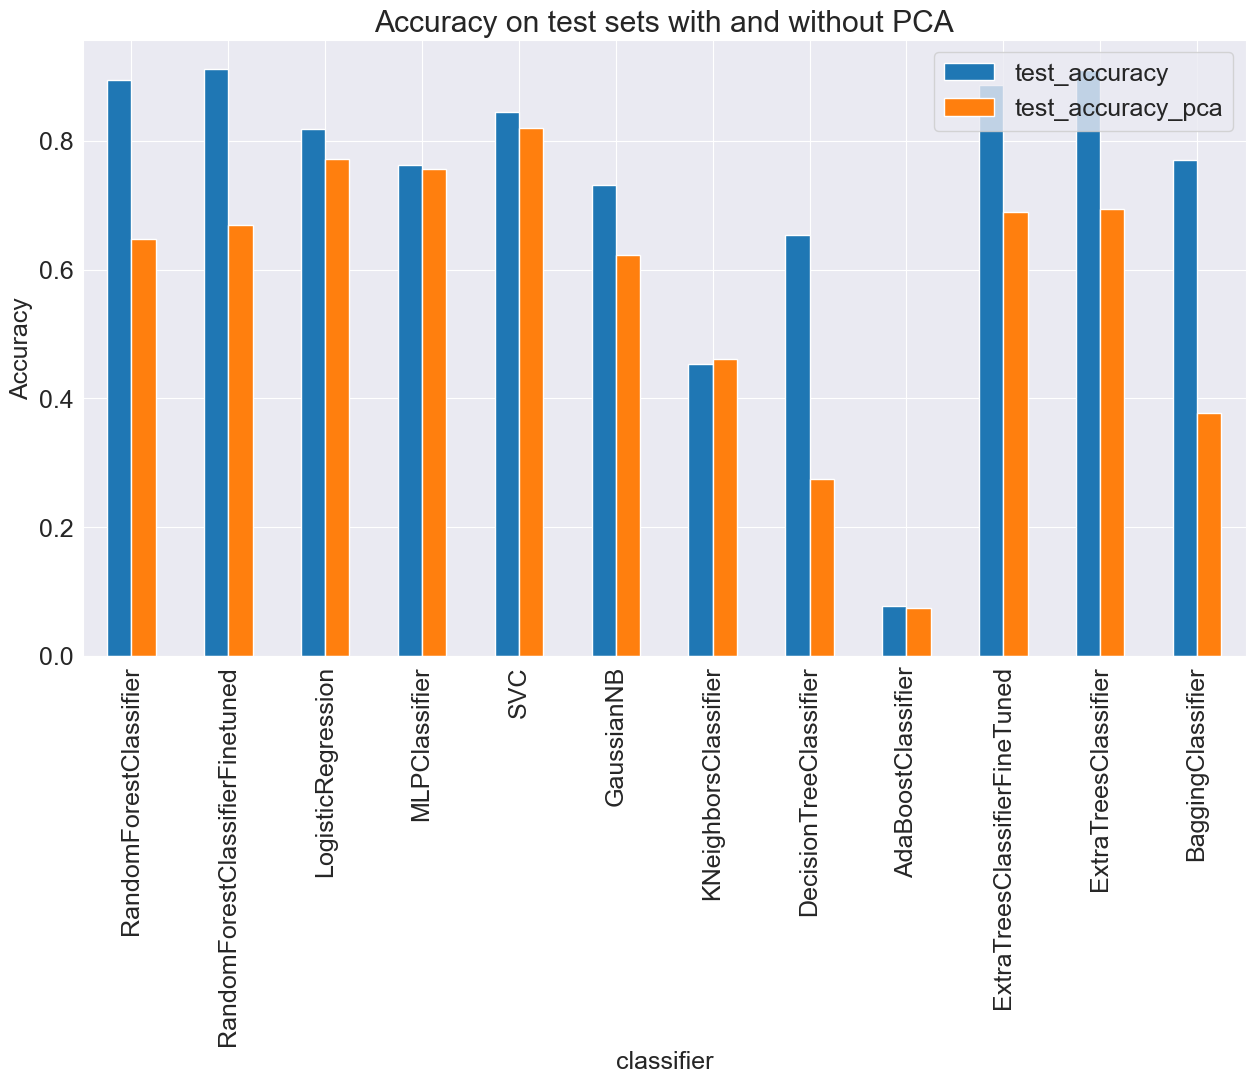

In [145]:
all_results = pd.concat(
    [
        pca_comparison_results,
        pca_ensemble_comparison_results,
    ]
)
all_results.plot(kind="bar", figsize=(15, 8))
plt.ylabel("Accuracy")
plt.title("Accuracy on test sets with and without PCA")
plt.rc("font", size=18)
plt.show()

## Conclusions

- Applying principal component analysis made the performance of all classifiers worse, particularly those that are nonlinear.
- RFE showed more promising results than PCA, it would most likely improve the performance of the ensemble classifiers to run them on a dataset with features removed by RFE.
- Without PCA,
  - the best ensemble classifier from Task 3, the `ExtraTreesClassifier` was on par with the best-performing model from Task 2, the `RandomForestClassifier`.
  - Hyperparameter tuning did not improve the accuracy of `ExtraTreesClassifier` on the test set.
- Applying PCA,
  - the best classifier from Task 2 is `LogisticRegression` but that is thanks to the significantly lower accuracy score achieved by `RandomForestClassifier`,
  - when it comes to the ensemble models, `ExtraTreesClassifier` was again on par with `RandomForestClassifier`, but performed worse than `LogisticRegression.

Our initial expectation was that ensemble classifiers, particularly `RandomForestClassifier` would perform the best which mostly came true. Some models, `AdaBoostClassifier` in particular performed very poorly with the default parameters and would require significant hyperparameter optimization.
Feature reduction was obviously necessary given the wide dataset, but PCA did not improve the performance at all given the nonlinearities, so we would have to turn to other methods.
We used grid search coupled with cross-validation, in some cases with multiple rounds, to find the optimal values of the classifiers' most crucial hyperparameters.